## Data Generation

### Causal Graph

In [2]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
class SCM:
    def __init__(self,a,b,c,d,u1,u2,u3,u4):
        self.x1_obs = self.x1(u1)
        self.x2_obs = self.x2(a,u2)
        self.x3_obs = self.x3(b,c,u3)
        self.x4_obs = self.x4(d,u4)
        self.u1 = u1
        self.u2 = u2
        self.u3 = u3
        self.u4 = u4
        
           
    def x1(self,u1):
        x1 = u1
        return x1
    
    def x2(self,a,u2):
        x2 = a*self.x1_obs +u2
        return x2
    
    def x3(self,b,c,u3):
        x3 = b*self.x1_obs+c*self.x2_obs+u3
        return x3
    
    
    def x4(self,d,u4):
        x4 = d*self.x3_obs+u4
        return x4
    


## Intervention on Real Causal Graph

In [4]:
class SCM_INTERVENTION(SCM):
    def __init__(self,a,b,c,d,u1,u2,u3,u4):
        #super().__init__(a,b,c,d,u1,u2,u3,u4)
        self.x1_obs = super().x1(u1)
        self.x2_obs = 0.3
        self.x3_obs = super().x3(b,c,u3)
        self.x4_obs = super().x4(d,u4)


## Remove Edge

In [5]:
class SCM_REMOVE_EXO():
    def __init__(self,a,b,c,d,scm_true_obs):
        self.x1_obs = scm_true_obs.x1_obs
        self.x2_obs = scm_true_obs.x2_obs
        self.x3_obs = scm_true_obs.x3_obs
        self.x4_obs = scm_true_obs.x4_obs
        self.u1_obs     = self.u1()
        self.u2_obs     = self.u2(a)
        self.u3_obs     = self.u3(b,c)
        self.u4_obs     = self.u4(d)
    
    def u1(self):
        u1 =  self.x1_obs
        return u1
  
    def u2(self,a):
        u2 = self.x2_obs - a*self.x1_obs 
        return u2
 
    def u3(self,b,c):
        u3 = self.x3_obs - b*self.x1_obs - c*self.x2_obs
        return u3
   
    def u4(self,d):
        u4 = self.x4_obs - d*self.x3_obs
        return u4

In [6]:
class SCM_REMOVE_INTERVENTION(SCM):
    def __init__(self,a,b,c,d,scm_remove_exo):
        self.u1     = scm_remove_exo.u1_obs
        self.u2     = scm_remove_exo.u2_obs
        self.u3     = scm_remove_exo.u3_obs
        self.u4     = scm_remove_exo.u4_obs
        self.x1_obs = super().x1(self.u1)
        self.x2_obs = 0.3
        self.x3_obs = super().x3(b,c,self.u3)
        self.x4_obs = super().x4(d,self.u4)

In [7]:
mean = 0.0
std_dev = 1.0

### Intervention

In [8]:
CF_x1=[]
CF_x2=[]
CF_x3=[]
CF_x4=[]

for i in range(0,100):
    u1 = round(np.random.normal(mean,std_dev),2)
    u2 = round(np.random.normal(mean,std_dev),2)
    u3 = round(np.random.normal(mean,std_dev),2)
    u4 = round(np.random.normal(mean,std_dev),2)
    a = 1
    b = 2
    c = 3
    d = 0.5
    scm_generation = SCM(a,b,c,d,u1,u2,u3,u4)
    # Data generation from the true SCM
    scm_intervention = SCM_INTERVENTION(a,b,c,d,u1,u2,u3,u4)
    # True Counterfactual point do(x2=0.3)
    #for j in range(0,4):
        #if j == 0:
            #a = 0
    # Remove the edge from x2 to x3
            #scm_remove_exo = SCM_REMOVE_EXO(a,b,c,d,scm_generation)
            #scm_remove_intervention = SCM_REMOVE_INTERVENTION(a,b,c,d,scm_remove_exo)
        #if j == 1:
           # b = 0
       # if j == 2:
    c = 0
       # if j == 3:
           # d = 0
    scm_remove_exo = SCM_REMOVE_EXO(a,b,c,d,scm_generation)
    

    scm_remove_intervention = SCM_REMOVE_INTERVENTION(a,b,c,d,scm_remove_exo)
    # Wrong Counterfactual point do(x2 =0.3)
    CF_x1.append((scm_remove_intervention.x1_obs - scm_intervention.x1_obs)**2)
    CF_x2.append((scm_remove_intervention.x2_obs - scm_intervention.x2_obs)**2)
    CF_x3.append((scm_remove_intervention.x3_obs - scm_intervention.x3_obs)**2)
    CF_x4.append((scm_remove_intervention.x4_obs - scm_intervention.x4_obs)**2)
    #print(scm_remove_intervention.x1_obs,scm_remove_intervention.x2_obs,scm_remove_intervention.x3_obs,scm_remove_intervention.x4_obs,sep='\n')

In [9]:
for i in [CF_x3, CF_x4]:
    print(f'{np.mean(i):.6f}')

20.413206
5.103301


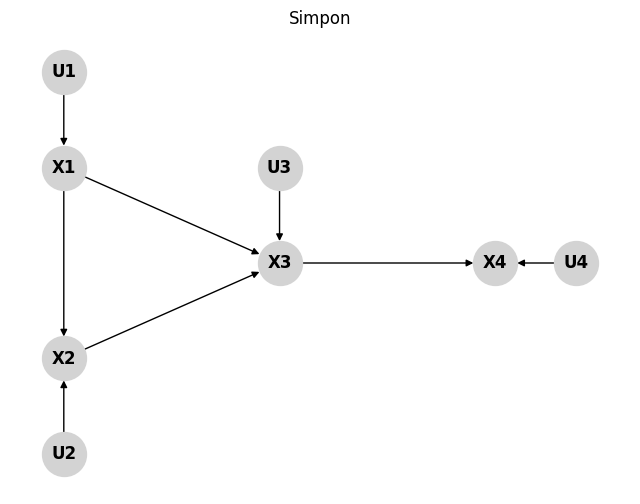

In [7]:
G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'X3', 'X4','U1','U2','U3','U4'])
G.add_edges_from([('U1','X1'),('U2','X2'),('U3','X3'),('U4','X4'),('X1', 'X2'), ('X1', 'X3'), ('X2', 'X3'),('X3','X4')])

plt.figure(figsize=(8, 6))
#bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)[source]

pos = {'U1':np.array([-1.  , 1.5]),
       'U2':np.array([-1.  , -1.5]),
    'X2': np.array([-1.  , -0.75]),
 'X1': np.array([-1.  ,  0.75]),
 'X3': np.array([ 1.  , 0.]),
 'U3': np.array([ 1.  , 0.75]),
 'U4': np.array([ 3.75  , 0.]),
 'X4': np.array([3 , 0])} 
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightgrey', font_size=12, font_weight='bold', arrows=True)
plt.title('Simpon')
plt.axis('off')  # Disable axis
plt.show()

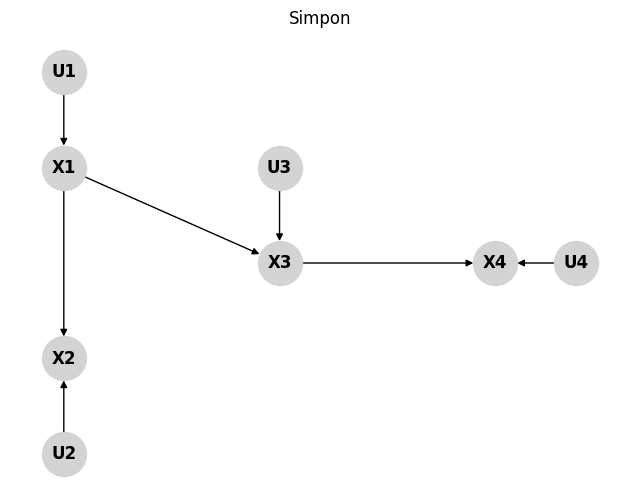

In [16]:
G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'X3', 'X4','U1','U2','U3','U4'])
G.add_edges_from([('U1','X1'),('U2','X2'),('U3','X3'),('U4','X4'),('X1', 'X2'), ('X1', 'X3'),('X3','X4')])

plt.figure(figsize=(8, 6))
#bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)[source]

pos = {'U1':np.array([-1.  , 1.5]),
       'U2':np.array([-1.  , -1.5]),
    'X2': np.array([-1.  , -0.75]),
 'X1': np.array([-1.  ,  0.75]),
 'X3': np.array([ 1.  , 0.]),
 'U3': np.array([ 1.  , 0.75]),
 'U4': np.array([ 3.75  , 0.]),
 'X4': np.array([3 , 0])} 
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightgrey', font_size=12, font_weight='bold', arrows=True)
plt.title('Simpon')
plt.axis('off')  # Disable axis
plt.show()